In [1]:
# model to predict user will click the ad or not based on his experience and estimated salary for a given data

In [1]:
# import libraries
import os
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# feature scaling
from sklearn.preprocessing import StandardScaler
# for handling categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
# for logistic regression model
from sklearn.svm import SVC

from matplotlib import pyplot as plt

# import function python file
import importlib.util
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve, auc
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve, GridSearchCV

from sklearn.metrics import explained_variance_score, make_scorer

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("function", "/home/admin1/PycharmProjects/Machine-Learning-Followship-Program/week_11/Utility/common_function.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
object_common_function = foo.function()


In [4]:
# Import dataset

dataset = object_common_function.load_data("Data/Social_Network_Ads .csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# drop unwanted col

dataset.drop(columns=['User ID','Gender'], inplace = True)

In [6]:
# information of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
# description of dataset 

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
# check for null

dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# check for duplicates
dataset.duplicated().sum()

33

In [10]:
dataset.min()

Age                   18
EstimatedSalary    15000
Purchased              0
dtype: int64

In [11]:
dataset.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [12]:
# os.mkdir("CSV_files")

In [13]:
# call function split data set

object_common_function.splitdata(dataset,0.30,0.20,"CSV_files")

train :  (280, 3)  test :  (120, 3)
train_data :  (224, 3)  crossV_data :  (56, 3)


In [14]:
# load train dataset

train_data = object_common_function.load_data("CSV_files/train_file.csv")
print("train_data has {} rows and {} Columns".format(train_data.shape[0],train_data.shape[1]))

train_data has 224 rows and 3 Columns


In [15]:
# check information 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
Age                224 non-null int64
EstimatedSalary    224 non-null int64
Purchased          224 non-null int64
dtypes: int64(3)
memory usage: 5.3 KB


In [16]:
train_data.head()

,Age,EstimatedSalary,Purchased
0,51,146000,1
1,19,25000,0
2,32,18000,0
3,35,79000,0
4,39,134000,1


In [17]:
size = len(train_data)
cv = KFold(size, shuffle=True)

In [18]:
# split dataset in feature and label

x_train = train_data.iloc[:,[0,1]].values
y_train = train_data.iloc[:,2].values


 confusion_matrix
 [[125  13]
 [ 27  59]]

 Accuracy Rate for Support Vector Classifier: 1.0
class_1_observed 100.0


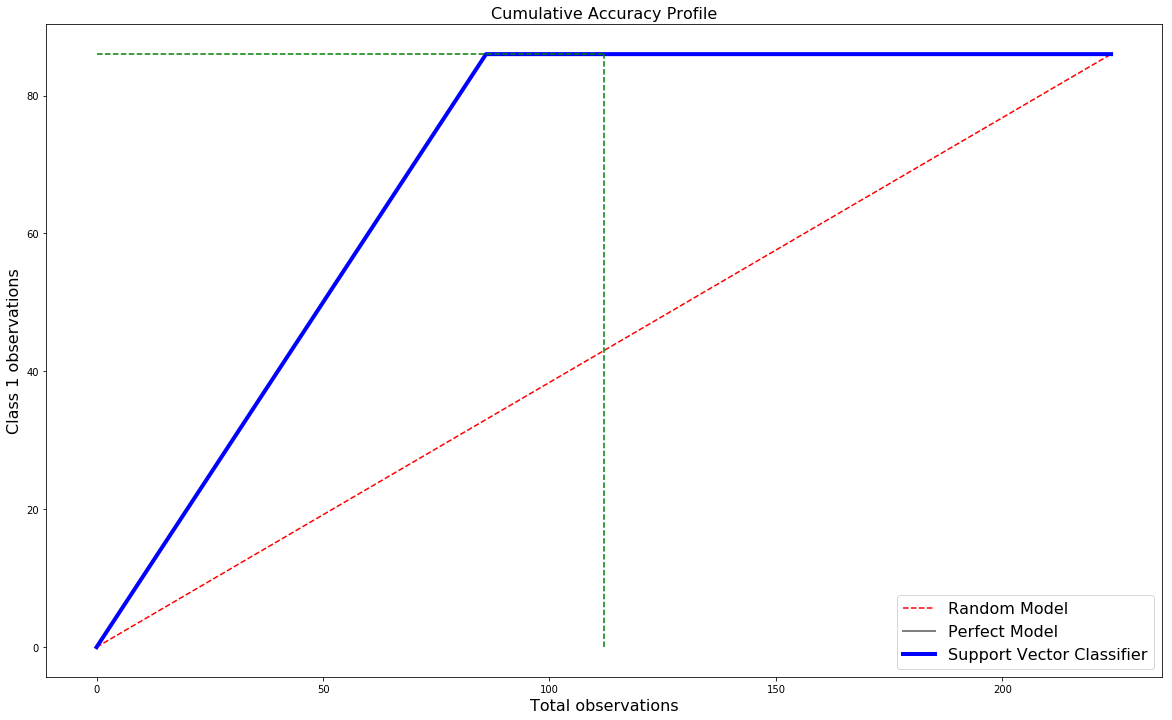

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


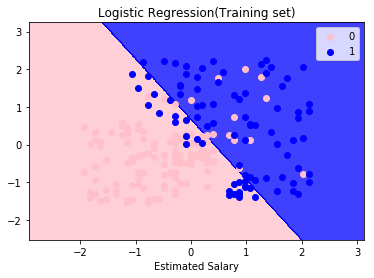

Accuracy: accuracy_score : 82.14285714285714
Accuracy: average_precision_score : 68.27127168696936
Accuracy:  balanced_accuracy_score : 79.59218065385912
Accuracy:  hamming_loss : 17.857142857142858
Accuracy:  fbeta_score : 82.14285714285714
pickel file create


In [19]:
class Support_Vector_Machine:
    
    # feature scaling
    
    def feature_scale(self,x_train):
        sc_x = StandardScaler()
        x_train = sc_x.fit_transform(x_train)
        return x_train
    
    # fit logistic regression model
    
    def fit_model(self,x_train,y_train):
         
        classifier = SVC(kernel='linear', random_state= 0,probability=True)
        classifier.fit(x_train,y_train)
        return classifier
    
    # confusion matrix
    
    def confusion_matrix(self,y_train,y_predict): 
        cm = confusion_matrix(y_train,y_predict)
        return cm
    
    def roc_curves(self,x_train,y_train,classifier):
        plt.figure(figsize = (20, 12))
        # Random Model
        plt.plot([0,1], [0,1], 'r--')
        probs = classifier.predict_proba(x_train)
        # Reading probability of second class (Salary >= $200K)
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(y_train, probs)
        roc_auc = auc(fpr, tpr)

        label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
        plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
        plt.xlabel('False Positive Rate', fontsize = 16)
        plt.ylabel('True Positive Rate', fontsize = 16)
        plt.title('Receiver Operating Characteristic', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
        plt.show()

#         plt.figure(figsize = (20, 12))
#         plt.plot([0,1], [0,1], 'r--')
        
        
#         probs = classifier.predict_proba(x_train)
        
#         probs = probs[:, 1]
#         fpr, tpr, thresholds = roc_curve(y_train, probs)
#         roc_auc = auc(fpr, tpr)
        
#         label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
#         plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
#         plt.xlabel('False Positive Rate', fontsize = 16)
#         plt.ylabel('True Positive Rate', fontsize = 16)
#         plt.title('Receiver Operating Characteristic', fontsize = 16)
#         plt.legend(loc = 'lower right', fontsize = 16)
#         plt.show()

    def cap_curves(self,x_train,y_train,classifier):
        total = len(y_train)
        ## 168
        class_1_count = np.sum(y_train)
        ## 70
        class_0_count = total - class_1_count
        ## 98
        plt.figure(figsize = (20, 12))
       
        #Random Model
        plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
       
        #Perfect Model
        plt.plot([0, class_1_count, total], [0, class_1_count, class_1_count], c = 'grey', linewidth = 2, label = 'Perfect Model')
       
        #Trained Model (Support Vector Classifier)
        probs = classifier.predict_proba(x_train)
       
        probs = probs[:, 1]
        model_y = [y for _, y in sorted(zip(probs, y_train), reverse = True)]
        y_values = np.append([0], np.cumsum(model_y))
        x_values = np.arange(0, total + 1)
       
        plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier', linewidth = 4)
        # Plot information
        plt.xlabel('Total observations', fontsize = 16)
        plt.ylabel('Class 1 observations', fontsize = 16)
        plt.title('Cumulative Accuracy Profile', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
       
        # Area under Random Model
        a = auc([0, total], [0, class_1_count])
        # Area between Perfect and Random Model
        aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - a
        # Area between Trained and Random Model
        aR = auc(x_values, y_values) - a
        print("\n Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))
      
        """CAP Analysis using Plot
        Another method to analyse the CAP Curve involves reading the plot we generated above"""
        # Point where vertical line will cut trained model
        index = int((50*total / 100))

        ## 50% Verticcal line from x-axis
        plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')

        ## Horizontal line to y-axis from prediction model
        plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')

        class_1_observed = y_values[index] * 100 / max(y_values)
        print("class_1_observed", class_1_observed)
        plt.show()
        
    def learning_curve(self,classifier, x_train,y_train, y_predict):
     
    
        # Learning curve
#         print(x.shape)
#         print(y.shape)
        # Visualization the training set result
        train_sizes, train_scores, test_scores = learning_curve(classifier, x_train, y_train, n_jobs=-1, cv=cv, train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.figure()
        plt.title("Random_forest Classification")
        plt.legend(loc="best")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.gca().invert_yaxis()

        # box-like grid
        plt.grid()

        # plot the std deviation as a transparent range at each training set size
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

        # plot the average training and test score lines at each training set size
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        # sizes the window for readability and displays the plot
        # shows error from 0 to 1.1
        plt.ylim(-.1,1.1)
        plt.show()



    
    
def main(x_train,y_train):
    
    # object
    object_LR = Support_Vector_Machine()
    
    # call function
    x_train_data = object_LR.feature_scale(x_train)
        
    classifier = object_LR.fit_model(x_train_data,y_train)
    
    y_predict = object_common_function.prediction(x_train_data,classifier)
    
    confusion_mat = object_LR.confusion_matrix(y_train,y_predict)
    print("\n confusion_matrix\n",confusion_mat )
    
#     object_LR.roc_curves(x_train,y_train,classifier)
    
    object_LR.cap_curves(x_train,y_train,classifier)
    
#     object_LR.learning_curve(classifier,x_train,y_train,y_predict)
    
    object_common_function.visualisation(x_train_data,y_train,classifier)
    
    accuracy,accuracy1,accuracy2,accuracy3,acc = object_common_function.Accuracy(y_train,y_predict)
    
    
    object_common_function.pickel_file(classifier,'trainmodel.pkl')
    print("pickel file create")
    
    

if __name__ == '__main__':
    main(x_train,y_train)